In [24]:
#Instalamos librería para análisis de variables categóricas
%pip install funpymodeling

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl 

ANÁLISIS CDMX

ETAPA 1: PROCESAMIENTO DE DATOS

In [26]:
#Carga desde un archivo csv
df= pd.read_csv('Df_Mexico1.csv', encoding='latin1') 

In [27]:
#Verificamos información del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24224 non-null  float64
 1   listing_url                                   24224 non-null  object 
 2   scrape_id                                     24224 non-null  float64
 3   last_scraped                                  24224 non-null  object 
 4   source                                        24224 non-null  object 
 5   name                                          24223 non-null  object 
 6   description                                   23296 non-null  object 
 7   neighborhood_overview                         15145 non-null  object 
 8   picture_url                                   24224 non-null  object 
 9   host_id                                       24224 non-null 

In [28]:
#Imprimo los primeros 5 registro del dataframe
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2056638.0,https://www.airbnb.com/rooms/2056638,2.020000e+13,30/03/2023,city scrape,Amplio y luminoso loft en CoyoacÃ¡n,CÃ³modo loft de dos pisos magnÃ­ficamente ubic...,NaN,https://a0.muscache.com/pictures/28353712/4379...,10531228,...,4.95,5.00,4.86,NaN,f,3,3,0,0,0.19
1,2072354.0,https://www.airbnb.com/rooms/2072354,2.020000e+13,30/03/2023,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,16840050,...,5.00,4.95,4.84,NaN,f,2,2,0,0,0.54
2,696037.0,https://www.airbnb.com/rooms/696037,2.020000e+13,29/03/2023,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,3531879,...,4.92,4.58,4.71,NaN,f,3,3,0,0,0.31
3,35797.0,https://www.airbnb.com/rooms/35797,2.020000e+13,29/03/2023,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
4,44616.0,https://www.airbnb.com/rooms/44616,2.020000e+13,30/03/2023,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,NaN,https://a0.muscache.com/pictures/251410/ec75fe...,196253,...,4.78,4.98,4.48,NaN,f,12,3,2,0,0.46


In [29]:
#Identificar valores nulos por columna
valores_nulos=df.isnull().sum()
valores_nulos

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               3596
Length: 75, dtype: int64

In [30]:
#Elegimos 20 variables a limpiar/analizar
df1=df.loc[ : , ["host_response_time","host_acceptance_rate", "host_identity_verified", "property_type",
                 "number_of_reviews", "availability_365", "review_scores_cleanliness", "review_scores_communication",
                 "review_scores_location", "review_scores_value", "host_location", "host_is_superhost", "beds", "price", "minimum_nights", 
                 "maximum_nights", "host_verifications", "bathrooms_text", "instant_bookable", "host_has_profile_pic" ]]

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_time           21133 non-null  object 
 1   host_acceptance_rate         22181 non-null  object 
 2   host_identity_verified       24224 non-null  object 
 3   property_type                24224 non-null  object 
 4   number_of_reviews            24224 non-null  int64  
 5   availability_365             24224 non-null  int64  
 6   review_scores_cleanliness    20573 non-null  float64
 7   review_scores_communication  20572 non-null  float64
 8   review_scores_location       20571 non-null  float64
 9   review_scores_value          20571 non-null  float64
 10  host_location                19052 non-null  object 
 11  host_is_superhost            24219 non-null  object 
 12  beds                         23953 non-null  float64
 13  price           

In [32]:
#Verificamos datos nulos de df1
valores_nulos=df1.isnull().sum()
valores_nulos

host_response_time             3091
host_acceptance_rate           2043
host_identity_verified            0
property_type                     0
number_of_reviews                 0
availability_365                  0
review_scores_cleanliness      3651
review_scores_communication    3652
review_scores_location         3653
review_scores_value            3653
host_location                  5172
host_is_superhost                 5
beds                            271
price                             0
minimum_nights                    0
maximum_nights                    0
host_verifications                0
bathrooms_text                   30
instant_bookable                  0
host_has_profile_pic              0
dtype: int64

LIMPIEZA CDMX

In [33]:
# review_scores_cleanliness, review_scores_communication, review_scores_location, 
#review_scores_value, beds, review_scores_checkin, reviews_per_month
# Ya que son variables numericas (de cantidad de baños o camas) colocamos el promedio de cada variable en los datos nulos
df1["review_scores_cleanliness"]=df1["review_scores_cleanliness"].fillna(round(df["review_scores_cleanliness"].mean(),1))
df1["review_scores_communication"]=df1["review_scores_communication"].fillna(round(df["review_scores_communication"].mean(),1))
df1["review_scores_location"]=df1["review_scores_location"].fillna(round(df["review_scores_location"].mean(),1))
df1["review_scores_value"]=df1["review_scores_value"].fillna(round(df["review_scores_value"].mean(),1))
df1["beds"]=df1["beds"].fillna(round(df["beds"].mean(),1))

In [34]:
#host_response_time, host_acceptance_rate, host_location, host_is_superhost
#Ya que son variables cualitativos, en todos los espacios nulos colocamos la palabra "DESCONOCIDO"
df1 = df1.fillna("DESCONOCIDO")
df1

,host_response_time,host_acceptance_rate,host_identity_verified,property_type,number_of_reviews,availability_365,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,host_location,host_is_superhost,beds,price,minimum_nights,maximum_nights,host_verifications,bathrooms_text,instant_bookable,host_has_profile_pic
0,within a day,DESCONOCIDO,f,Entire loft,21,324,4.95,4.95,5.00,4.86,"Mexico City, Mexico",f,1.0,1434,1,1125,['phone'],1.5 baths,f,t
1,DESCONOCIDO,DESCONOCIDO,t,Entire guest suite,61,346,4.88,5.00,4.95,4.84,"Mexico City, Mexico",f,1.0,830,3,1125,"['email', 'phone']",1 bath,f,t
2,within an hour,90%,t,Entire rental unit,39,87,4.71,4.92,4.58,4.71,"Mexico City, Mexico",t,3.0,1469,24,1125,"['email', 'phone']",2 baths,f,t
3,DESCONOCIDO,DESCONOCIDO,t,Entire villa,0,363,4.70,4.80,4.80,4.70,"Mexico City, Mexico",f,1.0,3658,1,7,"['email', 'phone', 'work_email']",1 bath,f,t
4,within an hour,86%,t,Entire home,64,357,4.70,4.78,4.98,4.48,"Mexico City, Mexico",f,8.0,18000,1,365,"['email', 'phone', 'work_email']",5.5 baths,f,t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,within an hour,100%,t,Entire rental unit,0,352,4.70,4.80,4.80,4.70,"Mexico City, Mexico",f,1.0,760,3,365,"['email', 'phone']",1 bath,f,t
24220,DESCONOCIDO,DESCONOCIDO,t,Entire rental unit,0,365,4.70,4.80,4.80,4.70,DESCONOCIDO,f,3.0,1520,1,365,['phone'],1 bath,t,t
24221,DESCONOCIDO,96%,t,Private room in home,0,180,4.70,4.80,4.80,4.70,"Mexico City, Mexico",f,1.0,533,5,365,"['email', 'phone']",2.5 shared baths,f,t
24222,within an hour,100%,t,Entire rental unit,0,344,4.70,4.80,4.80,4.70,"Mexico City, Mexico",t,1.0,1200,1,365,"['email', 'phone']",1 bath,t,t


In [35]:
#Verificamos datos nulos de df1
valores_nulos=df1.isnull().sum()
valores_nulos

host_response_time             0
host_acceptance_rate           0
host_identity_verified         0
property_type                  0
number_of_reviews              0
availability_365               0
review_scores_cleanliness      0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
host_location                  0
host_is_superhost              0
beds                           0
price                          0
minimum_nights                 0
maximum_nights                 0
host_verifications             0
bathrooms_text                 0
instant_bookable               0
host_has_profile_pic           0
dtype: int64

MÉTODO: RANGO INTERCUARTILICO

In [36]:
df_intercuartilico=df1.loc[ : , ["review_scores_cleanliness", "review_scores_communication", "review_scores_location", 
"review_scores_value", "beds", "number_of_reviews", "availability_365", "price",
"minimum_nights", "maximum_nights"]]
df_intercuartilico

,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,beds,number_of_reviews,availability_365,price,minimum_nights,maximum_nights
0,4.95,4.95,5.00,4.86,1.0,21,324,1434,1,1125
1,4.88,5.00,4.95,4.84,1.0,61,346,830,3,1125
2,4.71,4.92,4.58,4.71,3.0,39,87,1469,24,1125
3,4.70,4.80,4.80,4.70,1.0,0,363,3658,1,7
4,4.70,4.78,4.98,4.48,8.0,64,357,18000,1,365
...,...,...,...,...,...,...,...,...,...,...
24219,4.70,4.80,4.80,4.70,1.0,0,352,760,3,365
24220,4.70,4.80,4.80,4.70,3.0,0,365,1520,1,365
24221,4.70,4.80,4.80,4.70,1.0,0,180,533,5,365
24222,4.70,4.80,4.80,4.70,1.0,0,344,1200,1,365


In [37]:
df_cuali=df1.loc[ : , ["host_response_time", "host_acceptance_rate", "host_identity_verified", "property_type", "host_location", "host_is_superhost", 
                      "instant_bookable", "host_has_profile_pic", "bathrooms_text", "host_verifications", ]]
df_cuali

,host_response_time,host_acceptance_rate,host_identity_verified,property_type,host_location,host_is_superhost,instant_bookable,host_has_profile_pic,bathrooms_text,host_verifications
0,within a day,DESCONOCIDO,f,Entire loft,"Mexico City, Mexico",f,f,t,1.5 baths,['phone']
1,DESCONOCIDO,DESCONOCIDO,t,Entire guest suite,"Mexico City, Mexico",f,f,t,1 bath,"['email', 'phone']"
2,within an hour,90%,t,Entire rental unit,"Mexico City, Mexico",t,f,t,2 baths,"['email', 'phone']"
3,DESCONOCIDO,DESCONOCIDO,t,Entire villa,"Mexico City, Mexico",f,f,t,1 bath,"['email', 'phone', 'work_email']"
4,within an hour,86%,t,Entire home,"Mexico City, Mexico",f,f,t,5.5 baths,"['email', 'phone', 'work_email']"
...,...,...,...,...,...,...,...,...,...,...
24219,within an hour,100%,t,Entire rental unit,"Mexico City, Mexico",f,f,t,1 bath,"['email', 'phone']"
24220,DESCONOCIDO,DESCONOCIDO,t,Entire rental unit,DESCONOCIDO,f,t,t,1 bath,['phone']
24221,DESCONOCIDO,96%,t,Private room in home,"Mexico City, Mexico",f,f,t,2.5 shared baths,"['email', 'phone']"
24222,within an hour,100%,t,Entire rental unit,"Mexico City, Mexico",t,t,t,1 bath,"['email', 'phone']"


<Figure size 1500x800 with 0 Axes>

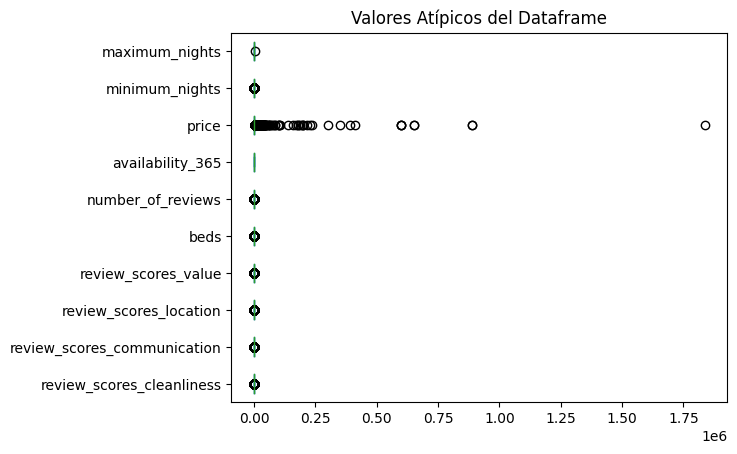

In [38]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
df_intercuartilico.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [39]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=df_intercuartilico

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido review_scores_cleanliness         5.350
review_scores_communication       5.300
review_scores_location            5.300
review_scores_value               5.265
beds                              3.500
number_of_reviews               104.500
availability_365                674.000
price                          3161.500
minimum_nights                    3.500
maximum_nights                 2542.500
dtype: float64
Limite inferior permitido review_scores_cleanliness         4.310
review_scores_communication       4.500
review_scores_location            4.500
review_scores_value               4.345
beds                             -0.500
number_of_reviews               -59.500
availability_365               -174.000
price                         -1002.500
minimum_nights                   -0.500
maximum_nights                -1237.500
dtype: float64


In [40]:
#Encontramos Outliers del Dataframe
outliers_iqr= df_intercuartilico[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,beds,number_of_reviews,availability_365,price,minimum_nights,maximum_nights
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3658.0,NaN,NaN
4,NaN,NaN,NaN,NaN,8.0,NaN,NaN,18000.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
24219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN
24222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
#Obtenemos datos limpios del Dataframe
data_iqr= df_intercuartilico[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_iqr

,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,beds,number_of_reviews,availability_365,price,minimum_nights,maximum_nights
0,4.95,4.95,5.00,4.86,1.0,21.0,324,1434.0,1.0,1125.0
1,4.88,5.00,4.95,4.84,1.0,61.0,346,830.0,3.0,1125.0
2,4.71,4.92,4.58,4.71,3.0,39.0,87,1469.0,NaN,1125.0
3,4.70,4.80,4.80,4.70,1.0,0.0,363,NaN,1.0,7.0
4,4.70,4.78,4.98,4.48,NaN,64.0,357,NaN,1.0,365.0
...,...,...,...,...,...,...,...,...,...,...
24219,4.70,4.80,4.80,4.70,1.0,0.0,352,760.0,3.0,365.0
24220,4.70,4.80,4.80,4.70,3.0,0.0,365,1520.0,1.0,365.0
24221,4.70,4.80,4.80,4.70,1.0,0.0,180,533.0,NaN,365.0
24222,4.70,4.80,4.80,4.70,1.0,0.0,344,1200.0,1.0,365.0


In [42]:
valores_nulos=data_iqr.isnull().sum()
valores_nulos

review_scores_cleanliness      1510
review_scores_communication    1498
review_scores_location         1209
review_scores_value            1859
beds                           2347
number_of_reviews              2308
availability_365                  0
price                          1707
minimum_nights                 3195
maximum_nights                    1
dtype: int64

In [43]:
#Reemplazamos valores atípicos (nulos) con "mean"
data1_iqr=data_iqr.copy()
data1_iqr=data1_iqr.fillna(round(data_iqr.mean(),1))
data1_iqr

,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,beds,number_of_reviews,availability_365,price,minimum_nights,maximum_nights
0,4.95,4.95,5.00,4.86,1.0,21.0,324,1434.0,1.0,1125.0
1,4.88,5.00,4.95,4.84,1.0,61.0,346,830.0,3.0,1125.0
2,4.71,4.92,4.58,4.71,3.0,39.0,87,1469.0,1.6,1125.0
3,4.70,4.80,4.80,4.70,1.0,0.0,363,1062.7,1.0,7.0
4,4.70,4.78,4.98,4.48,1.6,64.0,357,1062.7,1.0,365.0
...,...,...,...,...,...,...,...,...,...,...
24219,4.70,4.80,4.80,4.70,1.0,0.0,352,760.0,3.0,365.0
24220,4.70,4.80,4.80,4.70,3.0,0.0,365,1520.0,1.0,365.0
24221,4.70,4.80,4.80,4.70,1.0,0.0,180,533.0,1.6,365.0
24222,4.70,4.80,4.80,4.70,1.0,0.0,344,1200.0,1.0,365.0


In [44]:
Datos_DF_Limpios= pd.concat([df_cuali, df_intercuartilico], axis=1)
Datos_DF_Limpios

,host_response_time,host_acceptance_rate,host_identity_verified,property_type,host_location,host_is_superhost,instant_bookable,host_has_profile_pic,bathrooms_text,host_verifications,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,beds,number_of_reviews,availability_365,price,minimum_nights,maximum_nights
0,within a day,DESCONOCIDO,f,Entire loft,"Mexico City, Mexico",f,f,t,1.5 baths,['phone'],4.95,4.95,5.00,4.86,1.0,21,324,1434,1,1125
1,DESCONOCIDO,DESCONOCIDO,t,Entire guest suite,"Mexico City, Mexico",f,f,t,1 bath,"['email', 'phone']",4.88,5.00,4.95,4.84,1.0,61,346,830,3,1125
2,within an hour,90%,t,Entire rental unit,"Mexico City, Mexico",t,f,t,2 baths,"['email', 'phone']",4.71,4.92,4.58,4.71,3.0,39,87,1469,24,1125
3,DESCONOCIDO,DESCONOCIDO,t,Entire villa,"Mexico City, Mexico",f,f,t,1 bath,"['email', 'phone', 'work_email']",4.70,4.80,4.80,4.70,1.0,0,363,3658,1,7
4,within an hour,86%,t,Entire home,"Mexico City, Mexico",f,f,t,5.5 baths,"['email', 'phone', 'work_email']",4.70,4.78,4.98,4.48,8.0,64,357,18000,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,within an hour,100%,t,Entire rental unit,"Mexico City, Mexico",f,f,t,1 bath,"['email', 'phone']",4.70,4.80,4.80,4.70,1.0,0,352,760,3,365
24220,DESCONOCIDO,DESCONOCIDO,t,Entire rental unit,DESCONOCIDO,f,t,t,1 bath,['phone'],4.70,4.80,4.80,4.70,3.0,0,365,1520,1,365
24221,DESCONOCIDO,96%,t,Private room in home,"Mexico City, Mexico",f,f,t,2.5 shared baths,"['email', 'phone']",4.70,4.80,4.80,4.70,1.0,0,180,533,5,365
24222,within an hour,100%,t,Entire rental unit,"Mexico City, Mexico",t,t,t,1 bath,"['email', 'phone']",4.70,4.80,4.80,4.70,1.0,0,344,1200,1,365


In [45]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=Datos_DF_Limpios.isnull().sum()
valores_nulos

host_response_time             0
host_acceptance_rate           0
host_identity_verified         0
property_type                  0
host_location                  0
host_is_superhost              0
instant_bookable               0
host_has_profile_pic           0
bathrooms_text                 0
host_verifications             0
review_scores_cleanliness      0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
beds                           0
number_of_reviews              0
availability_365               0
price                          0
minimum_nights                 0
maximum_nights                 0
dtype: int64

In [46]:
#Convertir DataFrame a CSV
Datos_DF_Limpios.to_csv("Datos_limpios_DF_Mexico.csv")

EXTRACCIÓN DE CARACTERÍSTICAS Y VISUALIZACIÓN DE DATOS

In [47]:
Analisis_DF = Datos_DF_Limpios.copy()

In [48]:
Analisis_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_time           24224 non-null  object 
 1   host_acceptance_rate         24224 non-null  object 
 2   host_identity_verified       24224 non-null  object 
 3   property_type                24224 non-null  object 
 4   host_location                24224 non-null  object 
 5   host_is_superhost            24224 non-null  object 
 6   instant_bookable             24224 non-null  object 
 7   host_has_profile_pic         24224 non-null  object 
 8   bathrooms_text               24224 non-null  object 
 9   host_verifications           24224 non-null  object 
 10  review_scores_cleanliness    24224 non-null  float64
 11  review_scores_communication  24224 non-null  float64
 12  review_scores_location       24224 non-null  float64
 13  review_scores_va

Index(['host_response_time', 'frequency', 'percentage', 'cumulative_perc'], dtype='object')
0    0.701660
1    0.127601
2    0.081159
3    0.059858
4    0.029723
Name: percentage, dtype: float64
5
5


Text(0, 0.5, 'Frecuencia')

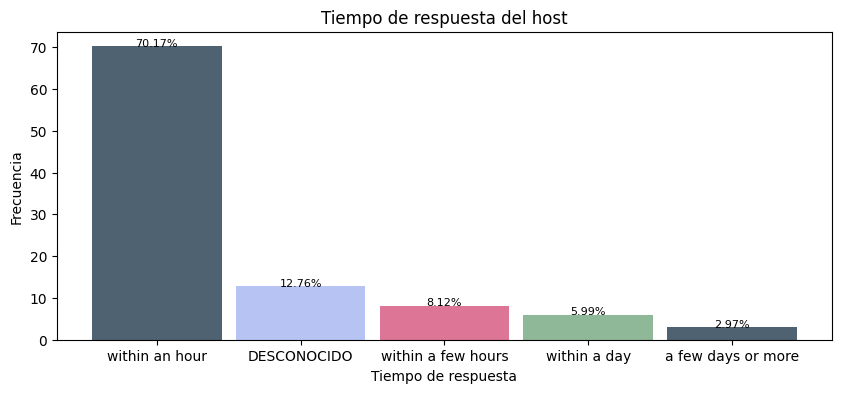

In [49]:
def addlabels(x,y):
    for i in range(len(x)):
        s= str(y[i])+"%"
        plt.text(i,y[i],s, ha='center', fontsize = 8)

#host_response_time
host_response_time=freq_tbl(Analisis_DF['host_response_time'])

print(host_response_time.columns)
x = host_response_time['host_response_time']
y = round(host_response_time['percentage'], ndigits=4)*100
print(host_response_time['percentage'])
print(len(x))
print(len(y))


plt.figure(figsize=(10,4))
plt.bar(x,y, width=0.9, color = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897'])


addlabels(x,y)

plt.title('Tiempo de respuesta del host')
plt.xlabel('Tiempo de respuesta')
plt.ylabel('Frecuencia')

Text(0.5, 1.0, 'Tasa de aceptación del host')

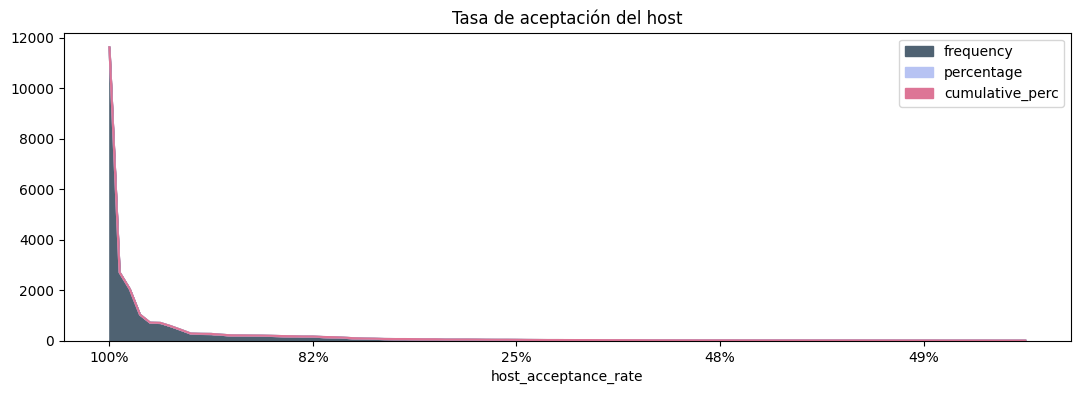

In [50]:
#host_acceptance_rate
host_acceptance_rate=freq_tbl(Analisis_DF['host_acceptance_rate'])
Filtro_host_acceptance_rate= host_acceptance_rate.set_index('host_acceptance_rate')
Filtro_host_acceptance_rate.plot(kind='area', figsize=(13,4), color = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897'])
plt.title('Tasa de aceptación del host')

Text(0.5, 1.0, 'Verificación de la identidad del host')

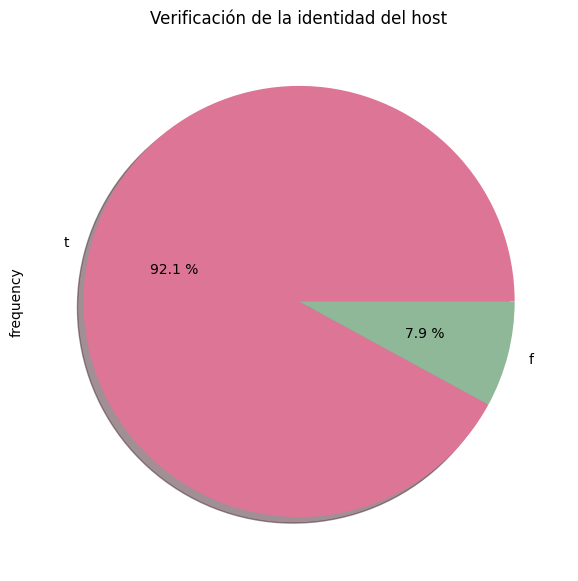

In [51]:
#host_identity_verified
host_identity_verified=freq_tbl(Analisis_DF['host_identity_verified'])
Filtro_host_identity_verified= host_identity_verified.set_index('host_identity_verified')
Filtro_host_identity_verified["frequency"].plot(kind='pie', figsize=(10,7), shadow=True, autopct="%0.1f %%", colors = ['#DD7596', '#8EB897'])
plt.title('Verificación de la identidad del host')

In [52]:
#property_type TOP 10
property_type=freq_tbl(Analisis_DF['property_type'])
Filtro_property_type= property_type.set_index('property_type')
Filtro_property_type.head(10)

,frequency,percentage,cumulative_perc
property_type,,,
Entire rental unit,8145,0.336237,0.336237
Entire condo,3363,0.138829,0.475066
Private room in rental unit,2860,0.118065,0.593131
Private room in home,2009,0.082934,0.676065
Entire loft,1584,0.065390,0.741455
Entire serviced apartment,1067,0.044047,0.785502
Private room in condo,917,0.037855,0.823357
Entire home,661,0.027287,0.850644
Room in hotel,381,0.015728,0.866372


In [53]:
#number_of_reviews 
Analisis_DF['number_of_reviews']= Analisis_DF['number_of_reviews'].astype(str)
number_of_reviews=freq_tbl(Analisis_DF['number_of_reviews'])
Filtro_number_of_reviews= number_of_reviews.set_index('number_of_reviews')
Filtro_number_of_reviews

,frequency,percentage,cumulative_perc
number_of_reviews,,,
0,3596,0.148448,0.148448
1,1777,0.073357,0.221805
2,1209,0.049909,0.271714
3,1014,0.041859,0.313573
4,769,0.031745,0.345319
...,...,...,...
313,1,0.000041,0.999835
416,1,0.000041,0.999876
402,1,0.000041,0.999917


Text(0.5, 1.0, 'Disponibilidad de 365')

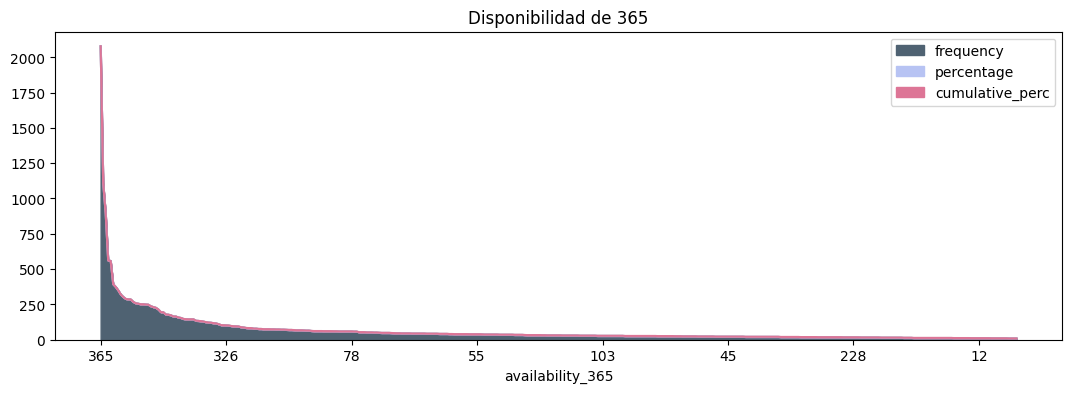

In [54]:
#availability_365
Analisis_DF['availability_365']= Analisis_DF['availability_365'].astype(str)
availability_365=freq_tbl(Analisis_DF['availability_365'])
Filtro_availability_365= availability_365.set_index('availability_365')
Filtro_availability_365.plot(kind='area', figsize=(13,4), color = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897'])
plt.title('Disponibilidad de 365')

Text(0.5, 1.0, 'Calificacion de limpieza')

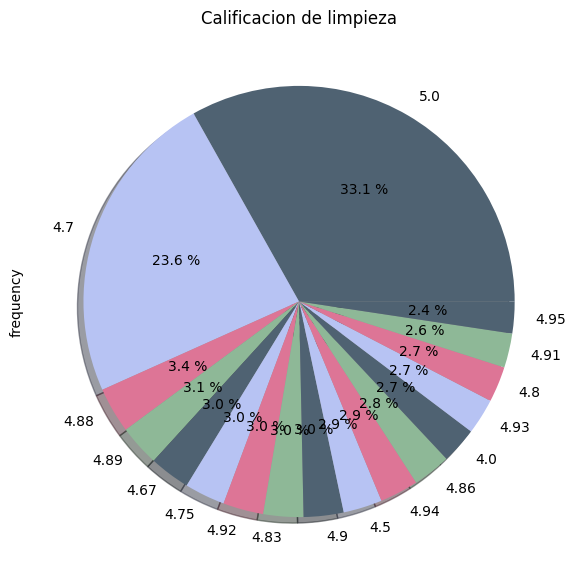

In [55]:
#review_scores_cleanliness
Analisis_DF['review_scores_cleanliness']= Analisis_DF['review_scores_cleanliness'].astype(str)
review_scores_cleanliness=freq_tbl(Analisis_DF['review_scores_cleanliness'])
Filtro_review_scores_cleanliness= review_scores_cleanliness.set_index('review_scores_cleanliness')
Filtro = Filtro_review_scores_cleanliness[Filtro_review_scores_cleanliness['frequency']>350]
Filtro["frequency"].plot(kind='pie', figsize=(10,7), shadow=True, autopct="%0.1f %%", colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897'])
plt.title('Calificacion de limpieza')

Text(0.5, 1.0, 'Calificacion de comunicacion')

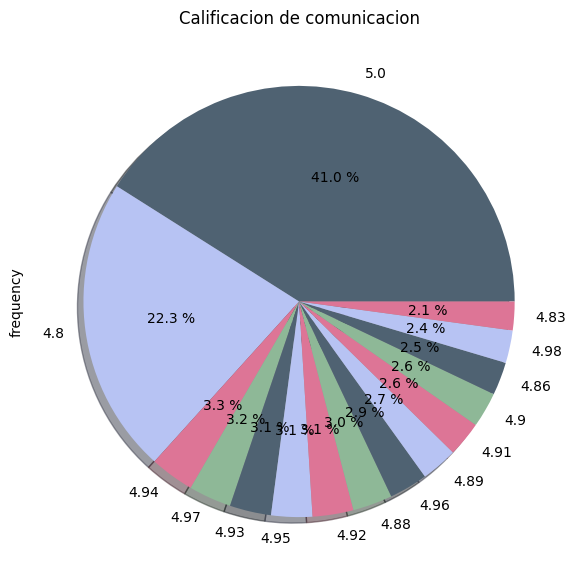

In [56]:
#review_scores_communication
Analisis_DF['review_scores_communication']= Analisis_DF['review_scores_communication'].astype(str)
review_scores_communication=freq_tbl(Analisis_DF['review_scores_communication'])
Filtro_review_scores_communication= review_scores_communication.set_index('review_scores_communication')
Filtro = Filtro_review_scores_communication[Filtro_review_scores_communication['frequency']>350]
Filtro["frequency"].plot(kind='pie', figsize=(10,7), shadow=True, autopct="%0.1f %%", colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897'])
plt.title('Calificacion de comunicacion')

Text(0.5, 1.0, 'Calificacion de locacion')

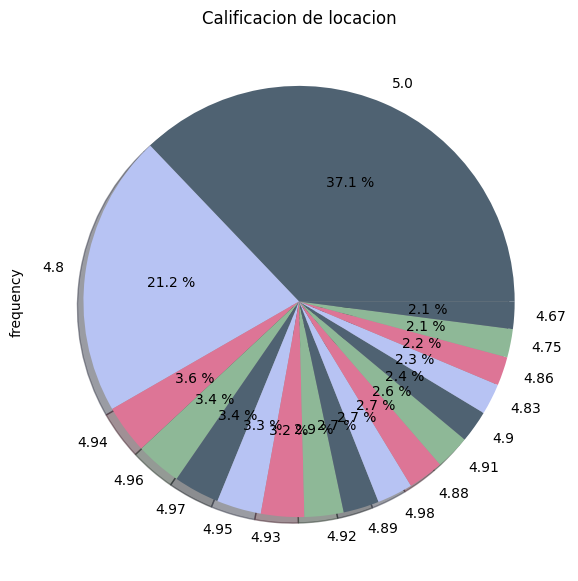

In [57]:
#review_scores_location
Analisis_DF['review_scores_location']= Analisis_DF['review_scores_location'].astype(str)
review_scores_location=freq_tbl(Analisis_DF['review_scores_location'])
Filtro_review_scores_location= review_scores_location.set_index('review_scores_location')
Filtro = Filtro_review_scores_location[Filtro_review_scores_location['frequency']>350]
Filtro["frequency"].plot(kind='pie', figsize=(10,7), shadow=True, autopct="%0.1f %%", colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897'])
plt.title('Calificacion de locacion')

Text(0.5, 1.0, 'Calificacion de valor')

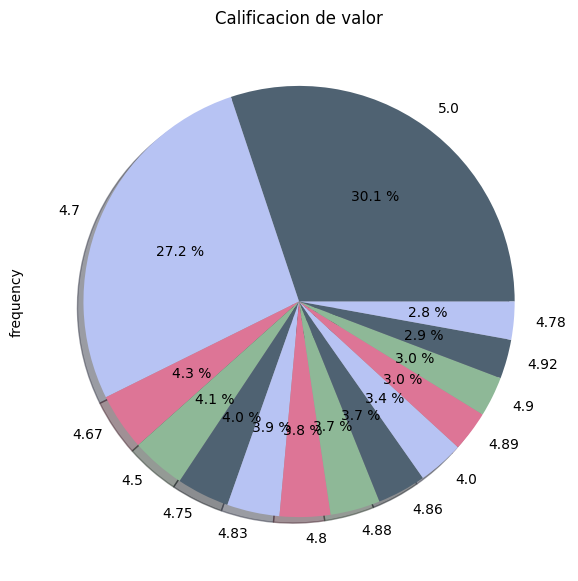

In [58]:
#review_scores_value
Analisis_DF['review_scores_value']= Analisis_DF['review_scores_value'].astype(str)
review_scores_value=freq_tbl(Analisis_DF['review_scores_value'])
Filtro_review_scores_value= review_scores_value.set_index('review_scores_value')
Filtro = Filtro_review_scores_value[Filtro_review_scores_value['frequency']>400]
Filtro["frequency"].plot(kind='pie', figsize=(10,7), shadow=True, autopct="%0.1f %%", colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897'])
plt.title('Calificacion de valor')

In [59]:
#host_location
host_location=freq_tbl(Analisis_DF['host_location'])
Filtro_host_location= host_location.set_index('host_location')
Filtro_host_location.head(10)

,frequency,percentage,cumulative_perc
host_location,,,
"Mexico City, Mexico",15525,0.640893,0.640893
DESCONOCIDO,5172,0.213507,0.854401
Mexico,1016,0.041942,0.896342
"Federal District, Mexico",232,0.009577,0.905920
"Ciudad de Mexico, Mexico",187,0.007720,0.913639
"New York, NY",162,0.006688,0.920327
"Santiago de QuerÃ©taro, Mexico",158,0.006522,0.926849
"Naucalpan de JuÃ¡rez, Mexico",113,0.004665,0.931514
"Cuernavaca, Mexico",76,0.003137,0.934652


Text(0.5, 1.0, '¿El host es un super host?')

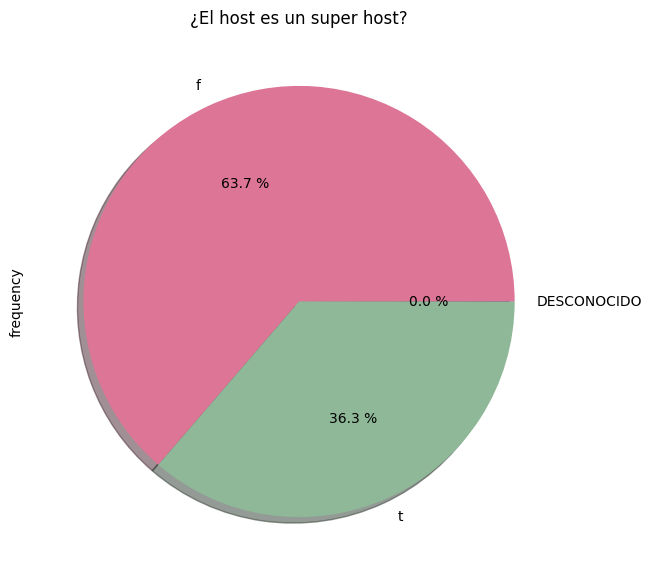

In [60]:
#host_is_superhost
host_is_superhost=freq_tbl(Analisis_DF['host_is_superhost'])
Filtro_host_is_superhost= host_is_superhost.set_index('host_is_superhost')
Filtro_host_is_superhost["frequency"].plot(kind='pie', figsize=(10,7), shadow=True, autopct="%0.1f %%", colors = ['#DD7596', '#8EB897', '#4F6272'])
plt.title('¿El host es un super host?')

Text(0.5, 1.0, 'Foto de perfil del host')

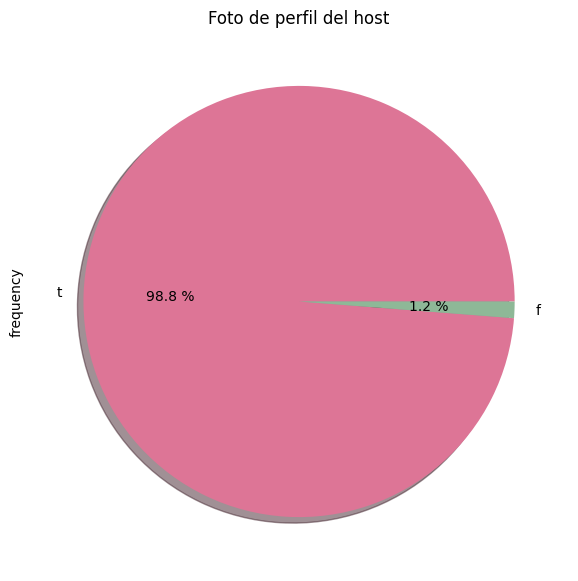

In [61]:
#host_has_profile_pic
host_has_profile_pic=freq_tbl(Analisis_DF['host_has_profile_pic'])
Filtro_host_has_profile_pic= host_has_profile_pic.set_index('host_has_profile_pic')
Filtro_host_has_profile_pic["frequency"].plot(kind='pie', figsize=(10,7), shadow=True, autopct="%0.1f %%", colors = ['#DD7596', '#8EB897', '#4F6272'])
plt.title('Foto de perfil del host')

Text(0.5, 1.0, 'Reserva inmediata')

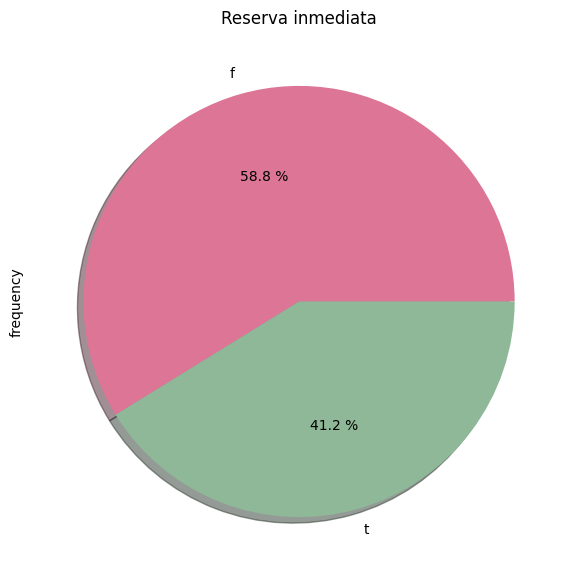

In [62]:
#instant_bookable
instant_bookable=freq_tbl(Analisis_DF['instant_bookable'])
Filtro_instant_bookable= instant_bookable.set_index('instant_bookable')
Filtro_instant_bookable["frequency"].plot(kind='pie', figsize=(10,7), shadow=True, autopct="%0.1f %%", colors = ['#DD7596', '#8EB897', '#4F6272'])
plt.title('Reserva inmediata')

In [63]:
Analisis_DF['beds']= Analisis_DF['beds'].astype(int)


Text(0.5, 1.0, 'Numero de camas')

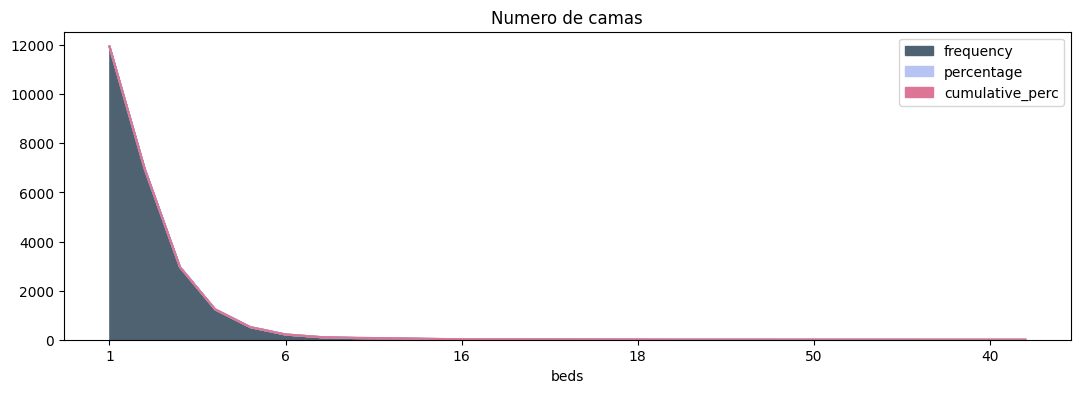

In [64]:
#beds
Analisis_DF['beds']= Analisis_DF['beds'].astype(str)
beds=freq_tbl(Analisis_DF['beds'])
Filtro_beds= beds.set_index('beds')
Filtro_beds.plot(kind='area', figsize=(13,4), color = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897'])
plt.title('Numero de camas')

Index(['bathrooms_text', 'frequency', 'percentage', 'cumulative_perc'], dtype='object')
0    0.377270
1    0.173506
2    0.133834
3    0.116991
4    0.057588
Name: percentage, dtype: float64
5
5


Text(0, 0.5, 'Frecuencia')

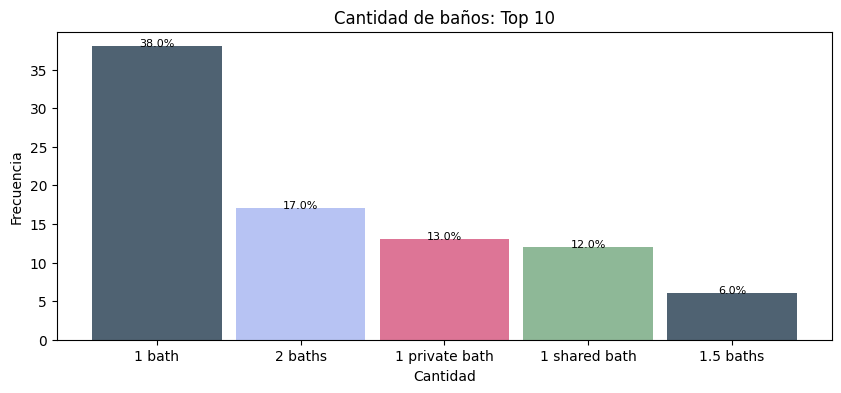

In [65]:
#bathrooms_text

def addlabels(x,y):
    for i in range(len(x)):
        s= str(y[i])+"%"
        plt.text(i,y[i],s, ha='center', fontsize = 8)

bathrooms_text=freq_tbl(Analisis_DF['bathrooms_text'])
Filtro = bathrooms_text[bathrooms_text['frequency']>900]

print(Filtro.columns)
x = Filtro['bathrooms_text']
y = round(Filtro['percentage'], ndigits=2)*100
print(Filtro['percentage'])
print(len(x))
print(len(y))



plt.figure(figsize=(10,4))
plt.bar(x,y, width=0.9, color = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897'])


addlabels(x,y)

plt.title('Cantidad de baños: Top 10')
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')

Index(['host_verifications', 'frequency', 'percentage', 'cumulative_perc'], dtype='object')
0    0.770145
1    0.138375
2    0.087310
Name: percentage, dtype: float64
3
3


Text(0, 0.5, 'Frecuencia')

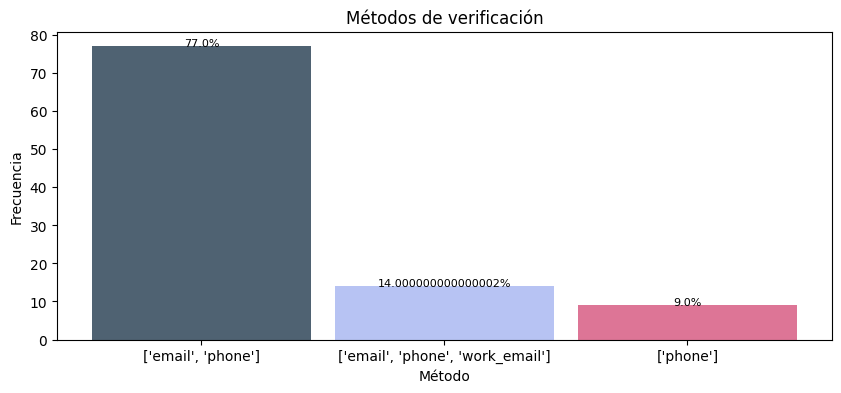

In [66]:
#host_verifications
def addlabels(x,y):
    for i in range(len(x)):
        s= str(y[i])+"%"
        plt.text(i,y[i],s, ha='center', fontsize = 8)

host_verifications=freq_tbl(Analisis_DF['host_verifications'])
Filtro = host_verifications[host_verifications['frequency']>400]

print(Filtro.columns)
x = Filtro['host_verifications']
y = round(Filtro['percentage'], ndigits=2)*100
print(Filtro['percentage'])
print(len(x))
print(len(y))



plt.figure(figsize=(10,4))
plt.bar(x,y, width=0.9, color = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897'])


addlabels(x,y)

plt.title('Métodos de verificación')
plt.xlabel('Método')
plt.ylabel('Frecuencia')

Text(0.5, 1.0, 'Noches mínimas')

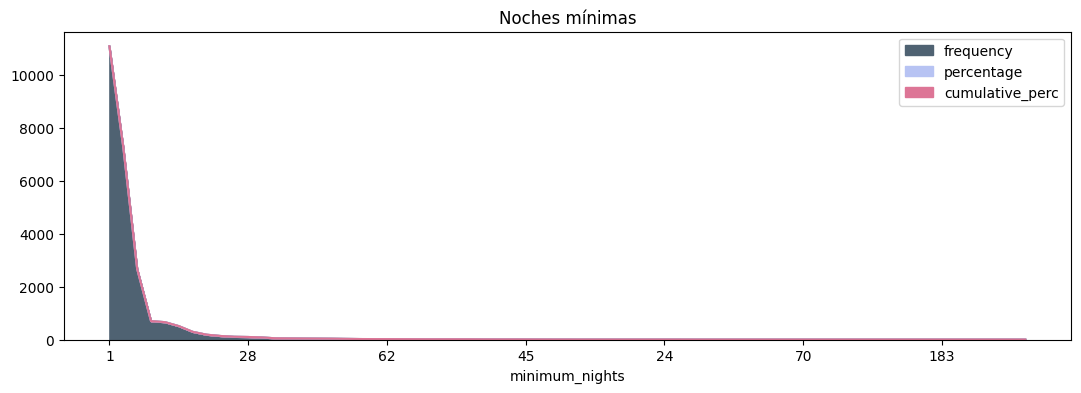

In [67]:
#minimum_nights
Analisis_DF['minimum_nights']= Analisis_DF['minimum_nights'].astype(str)
minimum_nights=freq_tbl(Analisis_DF['minimum_nights'])
Filtro_minimum_nights= minimum_nights.set_index('minimum_nights')
Filtro_minimum_nights.plot(kind='area', figsize=(13,4), color = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897'])
plt.title('Noches mínimas')


Text(0.5, 1.0, 'Noches máximas')

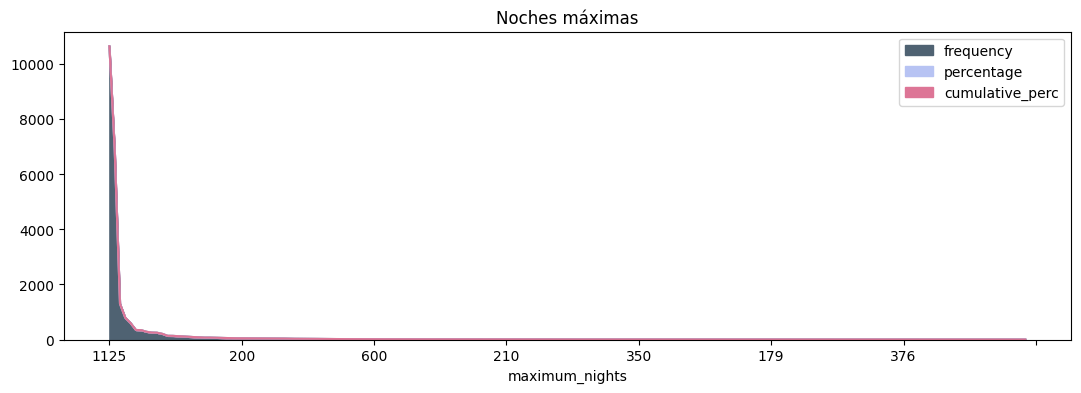

In [68]:
#maximum_nights
Analisis_DF['maximum_nights']= Analisis_DF['maximum_nights'].astype(str)
maximum_nights=freq_tbl(Analisis_DF['maximum_nights'])
Filtro_maximum_nights= maximum_nights.set_index('maximum_nights')
Filtro_maximum_nights.plot(kind='area', figsize=(13,4), color = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897'])
plt.title('Noches máximas')

Index(['number_of_reviews', 'frequency', 'percentage', 'cumulative_perc'], dtype='object')
0     0.148448
1     0.073357
2     0.049909
3     0.041859
4     0.031745
5     0.025925
6     0.023778
7     0.021714
8     0.019898
9     0.018700
10    0.016554
11    0.015481
12    0.015274
13    0.013582
14    0.013416
15    0.013210
16    0.012591
Name: percentage, dtype: float64
17
17


Text(0, 0.5, 'Frecuencia')

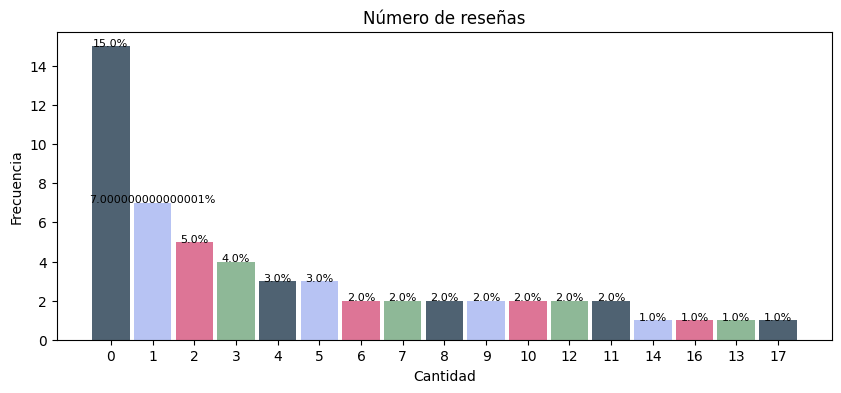

In [72]:
#number_of_reviews


def addlabels(x,y):
    for i in range(len(x)):
        s= str(y[i])+"%"
        plt.text(i,y[i],s, ha='center', fontsize = 8)

number_of_reviews=freq_tbl(Analisis_DF['number_of_reviews'])
Filtro = number_of_reviews[number_of_reviews['frequency']>300]

print(Filtro.columns)
x = Filtro['number_of_reviews']
y = round(Filtro['percentage'], ndigits=2)*100
print(Filtro['percentage'])
print(len(x))
print(len(y))



plt.figure(figsize=(10,4))
plt.bar(x,y, width=0.9, color = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897'])


addlabels(x,y)

plt.title('Número de reseñas')
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')